<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using. Include a link to the source of this data. You should also provide some explanation on why you choose this dataset.

Data dowloard from Kaggle https://www.kaggle.com/datasets/promptcloud/amazon-product-reviews-dataset?resource=download


**Reason**:


Why this dataset? : I **love** online shopping.  For this analysis, I'd like to examine the AMAZON product review and gain insights into what resonates well with customers for product marketing and development efforts.


Question:   'What are the top-rated subcategories, and do verified purchases affect review ratings?'

# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.

In [1]:
import pandas as pd # import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/yinaS1234/data-602/main/hw/amazon_product_reviews.csv'
df = pd.read_csv(url)  # Load dataset

print(df.info())  # Dataset structure
print(df.describe(include='all'))  # Summary stats
print(df.isnull().any())  # Null values check
print(df.head())  # Preview data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                50 non-null     object 
 1   Crawl Timestamp        50 non-null     object 
 2   Billing Uniq Id        50 non-null     object 
 3   Rating                 0 non-null      float64
 4   Review Title           50 non-null     object 
 5   Review Rating          50 non-null     float64
 6   Review Date            50 non-null     object 
 7   User Id                50 non-null     object 
 8   Brand                  50 non-null     object 
 9   Category               49 non-null     object 
 10  Sub Category           49 non-null     object 
 11  Product Description    49 non-null     object 
 12  Asin                   50 non-null     object 
 13  Url                    50 non-null     object 
 14  Review Content         50 non-null     object 
 15  Verified

# Data Wrangling

---



Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [2]:
# Drop unnecessary columns for analysis
col_to_drop = ['Uniq Id', 'Crawl Timestamp', 'Billing Uniq Id', 'Rating', 'Url', 'Manufacturer Response']
df.drop(col_to_drop, axis=1, inplace=True)

# Replace spaces with underscores in column names for consistency
df.rename(columns=(lambda x: x.replace(" ", '_')), inplace=True)

# Convert 'Review_Date' to datetime format for easier handling
df.Review_Date = pd.to_datetime(df.Review_Date, format='%B %d, %Y')

# Remove rows with missing values to clean the data
df.dropna(axis=0, inplace=True)

# Group by 'Category' and 'Sub_Category', calculate mean 'Review_Rating', and reset index for clean dataframe
grouped = df.groupby(['Category', 'Sub_Category'])['Review_Rating'].mean().reset_index()

# Sort the grouped data by 'Category' and descending 'Review_Rating', then reset index
grouped = grouped.sort_values(by=['Category', 'Review_Rating'], ascending=[True, False]).reset_index(drop=True)
grouped  # Display the cleaned and organized dataframe


,Category,Sub_Category,Review_Rating
0,Beauty & Personal Care,Skin Care,4.666667
1,Beauty & Personal Care,Personal Care,3.666667
2,Grocery & Gourmet Food,Pantry Staples,4.750000
3,Grocery & Gourmet Food,Frozen,4.333333


#### M1-hist
Change the title and x/y labels

Change the size of axis Labels

Modify Axis Text Ticks/Labels

Add annotations


Change background and layout

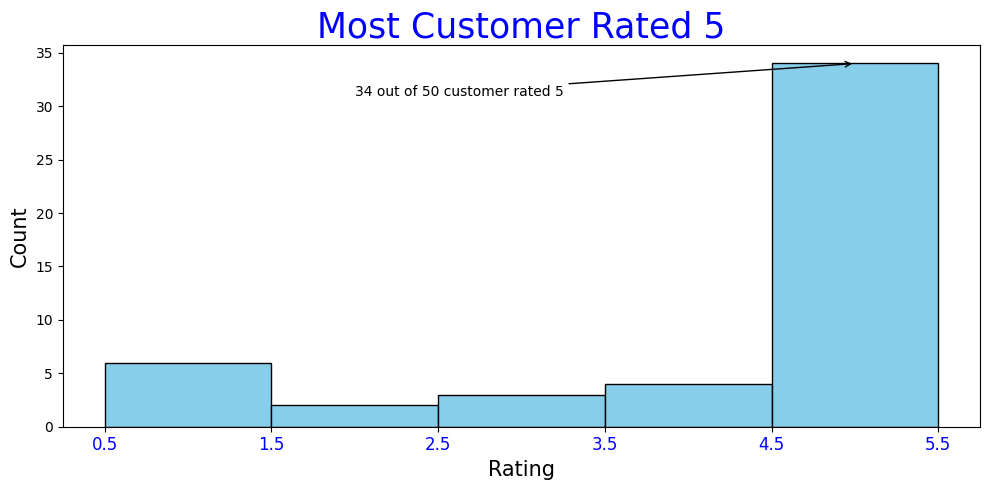

In [3]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 5))

# Plot a histogram with custom bins, edge color, and fill color
plt.hist(df['Review_Rating'], bins=np.arange(1, 7) - 0.5, edgecolor='black', color='skyblue')

# Change the size of axis labels to make them more readable
plt.xlabel('Rating', fontsize=15)  # Change the x-axis label and its font size
plt.ylabel('Count', fontsize=15)  # Change the y-axis label and its font size

# Customize the plot title with font size and color
plt.title('Most Customer Rated 5', fontsize=25, color='blue')

# Modify axis ticks to improve readability and aesthetics
plt.xticks(np.arange(1, 7) - 0.5, fontsize=12, color='blue')  # Change the ticks on the x-axis

# Add an annotation to highlight a specific data point
plt.annotate('34 out of 50 customer rated 5', xy=(5.0, 34), xytext=(2, 31),
             arrowprops=dict(facecolor='black', arrowstyle='->'))  # Add an annotation with an arrow

# Turn off the grid to avoid visual clutter
plt.grid(False)

# Set the background color of the axes for contrast
plt.gca().set_facecolor('white')

# Adjust the layout to make sure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()

#### M2-box
Change the title and x/y labels

Change the marker, line colors, and line width

Add annotations

Modify Axis Text Ticks/Labels

Change background and layout

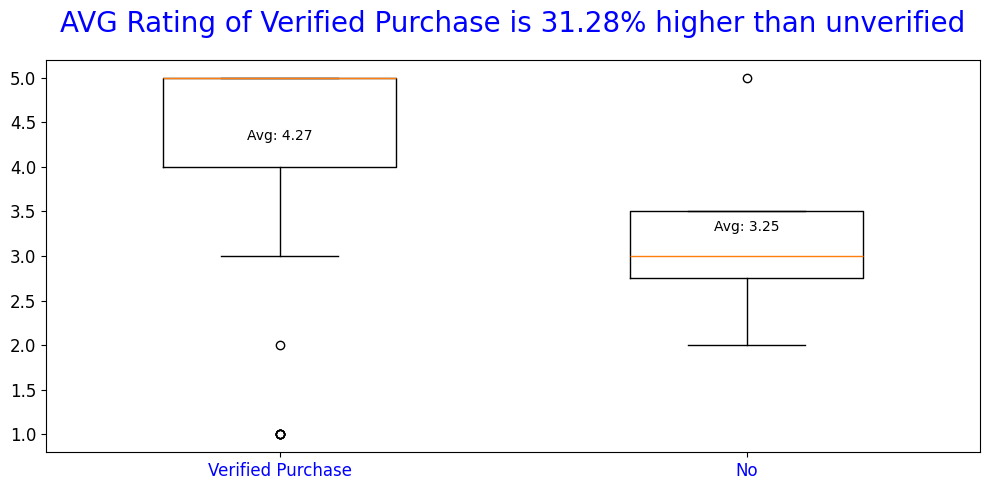

In [4]:
# Start a new figure with specified size
plt.figure(figsize=(10, 5))
verified_ratings=df[df['Verified_Purchase'] == 'Verified Purchase']['Review_Rating']
non_verified_ratings=df[df['Verified_Purchase'] == 'NO']['Review_Rating']
avg_verified=verified_ratings.mean()
avg_non_verified=non_verified_ratings.mean()
percent_diff=(avg_verified-avg_non_verified)/avg_non_verified *100 

# Create boxplots for verified and non-verified purchase ratings
# Change the marker, line colors, and line width properties are implicitly set by default boxplot style
plt.boxplot([verified_ratings, non_verified_ratings], labels=['Verified Purchase', 'No'], widths=0.5)

# Change the title and x/y labels
# Add dynamic title incorporating the percentage difference calculation with font size, color, and padding adjustments
plt.title(f'AVG Rating of Verified Purchase is {percent_diff:.2f}% higher than unverified', fontsize=20, color='blue', pad=20)

# x-axis label is set but left empty intentionally; font size and color adjustments are made
plt.xlabel('', fontsize=15, color='black')

# Modify Axis Text Ticks/Labels for x-axis with font size and color adjustments
plt.xticks(fontsize=12, color='blue')

# Modify Axis Text Ticks/Labels for y-axis with font size adjustments
plt.yticks(fontsize=12)

# Add annotations to display average ratings for both verified and non-verified purchases
# Annotations positioned at the mean value of each group with custom text, alignment, font size, and color
plt.text(1, avg_verified, f'Avg: {avg_verified:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(2, avg_non_verified, f'Avg: {avg_non_verified:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Disabling the grid for a cleaner look
plt.grid(False)

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Adjust layout for a tight fit
plt.tight_layout()

# Display the plot
plt.show()


#### M3-bar

Use and change a legend position

Change a legend font size

Place a legend outside of the plot

Change the title and x/y labels

Add annotations

Modify Axis Text Ticks/Labels

Change size of axis Labels

Change background setting

[]

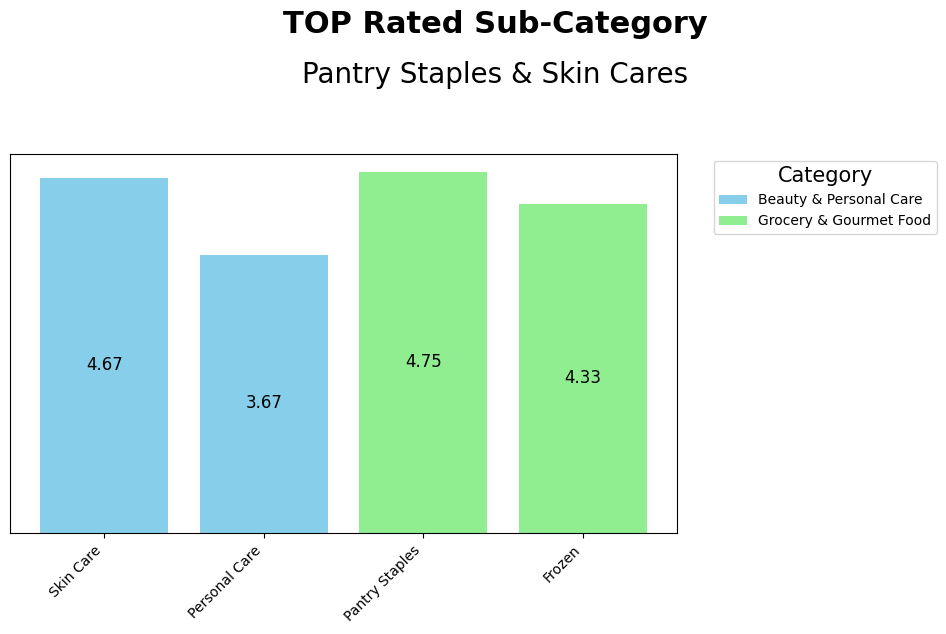

In [5]:
# Define color mapping for different categories
color_mapping = {
    'Beauty & Personal Care': 'skyblue',
    'Grocery & Gourmet Food': 'lightgreen'
}

# Initialize the figure with a specified size
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through each unique category in the dataset
for category in grouped.Category.unique():
    cat_data = grouped[grouped.Category == category]
    # Plot bars with colors based on category, using color mapping
    bars = plt.bar(cat_data.Sub_Category, cat_data.Review_Rating, color=color_mapping[category], label=category)

    # Add annotations to each bar, indicating the review rating
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{height:.2f}', ha='center', va='top', color='black', fontsize='12')

# Add a main title and a subtitle to the figure, changing the title properties
fig.text(0.5, 1.2, 'TOP Rated Sub-Category', fontsize=22, ha='center', va='bottom', fontweight='bold')
fig.text(0.5, 1.1, 'Pantry Staples & Skin Cares', fontsize=20, ha='center', va='bottom')

# Modify x-axis labels without changing the text, but changing the color
plt.xlabel('', fontsize=12, color='red')
# Modify Axis Text Ticks/Labels with rotation for better readability
plt.xticks(rotation=45, ha='right')
# Remove y-ticks as a stylistic choice
plt.yticks([])

# Place legend outside of the plot, change legend font size, and use a title for the legend
plt.legend(title='Category', title_fontsize='15', fontsize='10', bbox_to_anchor=(1.4, 1))

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Disable grid and set the figure background color to white
plt.grid(False)
plt.gca().set_facecolor('white')
# Hide y-tick labels for a cleaner look
plt.gca().set_yticklabels([])


### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.




#### S1-hist

Change the title and x/y labels

Change the size of axis Labels

Modify Axis Text Ticks/Labels

Add annotations


Change background and layout

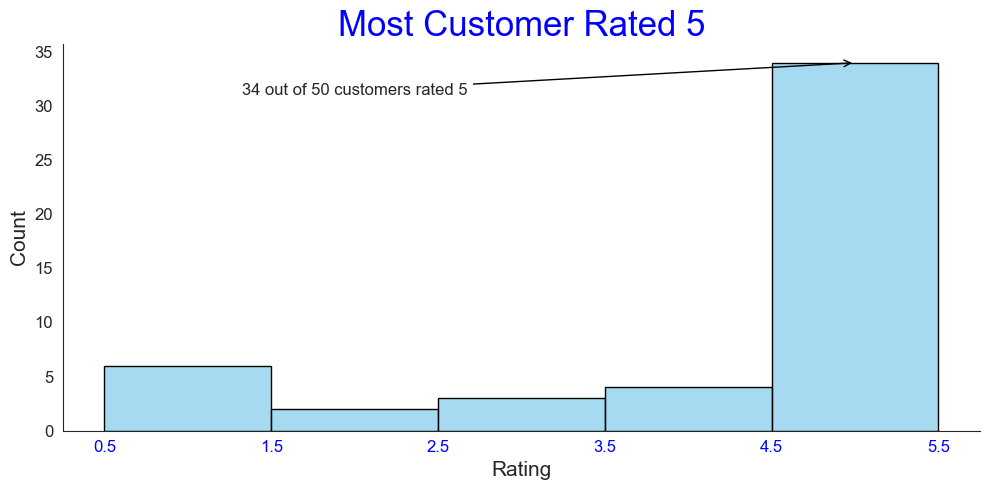

In [6]:

# Set the aesthetic style of the plots
sns.set_style('white')  # Set the background to white and remove the grid

# Create a histogram with Seaborn
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['Review_Rating'], bins=np.arange(1, 7)-0.5, kde=False, color='skyblue', edgecolor='black', ax=ax)

# Customizing the plot with Seaborn's set() method
ax.set(title='Most Customer Rated 5', xlabel='Rating', ylabel='Count')
ax.title.set_fontsize(25)
ax.title.set_color('blue')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.set_xticks(np.arange(1,7)-0.5)
ax.tick_params(axis='x', colors='blue', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# annotate graph with text and arrow
annotation_text = '34 out of 50 customers rated 5'
xy = (5, 34)
xytext = (2, 31)
ax.annotate(annotation_text, xy=xy, xytext=xytext, arrowprops=dict(edgecolor='black', arrowstyle='->'), fontsize=12, ha='center')

# Further customizations and finalizing the plot
sns.despine()  # Remove the top and right spines
plt.tight_layout()
plt.show()


#### S2-box


Change the title and x/y labels

Change the marker, line colors, and line width

Add annotations

Modify Axis Text Ticks/Labels

Change background and layout

/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_8441/21549322.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Verified Purchase', 'No'], fontsize=12, color='blue')
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_8441/21549322.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


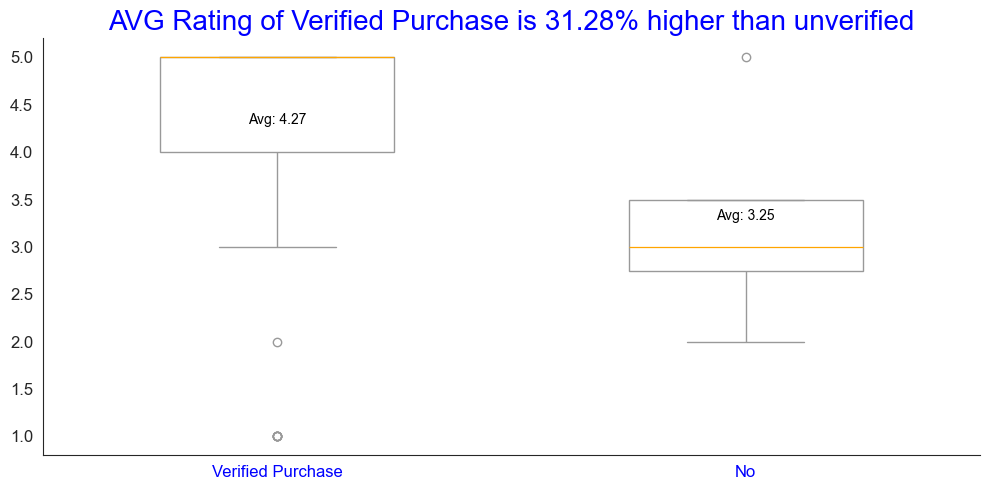

In [7]:

df['Verified_Purchase'] = df['Verified_Purchase'].astype('category')
df['Verified_Purchase'] = df['Verified_Purchase'].cat.reorder_categories(['Verified Purchase', 'NO'])
# Calculate average ratings
avg_verified = df[df['Verified_Purchase'] == 'Verified Purchase']['Review_Rating'].mean()
avg_non_verified = df[df['Verified_Purchase'] == 'NO']['Review_Rating'].mean()

# Calculate the percentage difference
percent_diff = ((avg_verified - avg_non_verified) / avg_non_verified) * 100

# Create the boxplot with Seaborn
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Verified_Purchase', y='Review_Rating', data=df, width=0.5, color='white')
ax.set_title(f'AVG Rating of Verified Purchase is {percent_diff:.2f}% higher than unverified', fontsize=20, color='blue')
ax.set_xlabel('', fontsize=15, color='black')
ax.set_ylabel('')
ax.set_xticklabels(['Verified Purchase', 'No'], fontsize=12, color='blue')
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
for line in ax.lines[1::3]:  # Access every third line which corresponds to the medians
    line.set_color('orange')
    line.set_linewidth(0.9)

# Annotate average ratings
plt.text(0, avg_verified, f'Avg: {avg_verified:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(1, avg_non_verified, f'Avg: {avg_non_verified:.2f}', ha='center', va='bottom', fontsize=10, color='black')

ax.grid(False)
sns.despine()  # Remove the top and right spines
plt.tight_layout()
plt.show()


#### S3-bar

Use and change a legend position

Change a legend font size

Place a legend outside of the plot

Change the title and x/y labels

Add annotations

Modify Axis Text Ticks/Labels

Change size of axis Labels

Change background setting

/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_8441/3008786142.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped['Sub_Category'], rotation=45, ha='right')


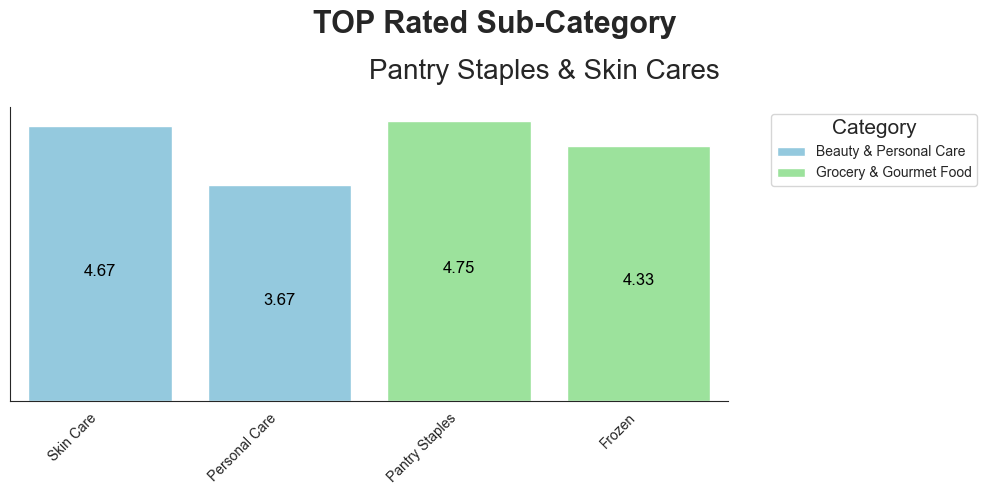

In [8]:


# Sample data for 'grouped' DataFrame
grouped = pd.DataFrame({
    'Category': ['Beauty & Personal Care', 'Beauty & Personal Care', 'Grocery & Gourmet Food', 'Grocery & Gourmet Food'],
    'Sub_Category': ['Skin Care', 'Personal Care', 'Pantry Staples', 'Frozen'],
    'Review_Rating': [4.666667, 3.666667, 4.750000, 4.333333]
})

# Set the aesthetic style of the plots
sns.set_style('white')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))
color_mapping = {
    'Beauty & Personal Care': 'skyblue',
    'Grocery & Gourmet Food': 'lightgreen'
}

# Plotting
sns.barplot(x='Sub_Category', y='Review_Rating', hue='Category', palette=color_mapping, data=grouped, ax=ax)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0.1:
    # Placing the text at the center of the bar, halfway up
        ax.text(patch.get_x() + patch.get_width() / 2, height / 2, f'{height:.2f}', 
                ha='center', va='top', color='black', fontsize=12)
# Customizing the legend
ax.legend(title='Category', title_fontsize='15', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding custom titles using fig.text
fig.suptitle('TOP Rated Sub-Category', fontsize=22, fontweight='bold')
ax.set_title('Pantry Staples & Skin Cares', fontsize=20, pad=20, ha='left')

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticklabels("")
ax.set_xticklabels(grouped['Sub_Category'], rotation=45, ha='right')

# Additional customizations
sns.despine()  # Removes the top and right spines
plt.tight_layout()

plt.show()


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Code Verbosity:

The Matplotlib plot requires more detailed customization code for elements like figure size, axis labels, and annotations.
Seaborn achieves similar results with fewer lines of code, thanks to its integrated functions and default settings that automatically handle many styling aspects.


Style and Aesthetics:

Seaborn automatically applies a default theme that is generally considered more modern and visually appealing, as seen with the sns.set_style('white'), sns.despine().
Matplotlib, while highly customizable, starts with a more basic appearance requiring manual adjustments for a comparable level of styling.


Data Handling:

Both examples use pandas data structures efficiently, but Seaborn's integration with pandas is more seamless, allowing for direct plotting from DataFrames with categorical data handling through astype('category') and cat.reorder_categories.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

Found that 'Pantry Staples' & 'Skin Care' ' are the favorites sub_category among the categories. Verified purchases score 31% higher in review. This highlighting the value of genuine feedback. 

These insights are super helpful and give me a lot to consider for future projects or discussions about product development and marketing strategies.